<a href="https://colab.research.google.com/github/KhushiTolwala/Hexart.in-AI-Center/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#impporting libraries
import pandas as pd

In [47]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#importing files
from google.colab import files
uploaded=files.upload()

Saving gold_monthly_csv (1).csv to gold_monthly_csv (1) (1).csv


In [49]:
#reading files
#removing index coloumn

df=pd.read_csv("gold_monthly_csv (1).csv",index_col=[0],parse_dates=[0])

In [50]:
df.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [51]:
#type of data
type(df)

pandas.core.frame.DataFrame

In [52]:
series_value = df.values

In [53]:
type(series_value)

numpy.ndarray

In [54]:
#size of the dataframe
df.size

847

In [55]:
#printing the last part of the dataframe
df.tail()

,Price
Date,
2020-03-01,1593.764
2020-04-01,1680.030
2020-05-01,1715.697
2020-06-01,1734.032
2020-07-01,1840.807


In [56]:
#describing the datafeame
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [57]:
df=df[0:847]

In [58]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


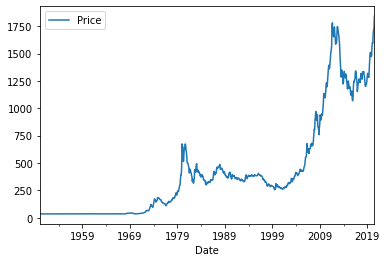

In [59]:
#plotting the graph
df.plot()

In [60]:
df_mean = df.rolling(window = 20).mean()

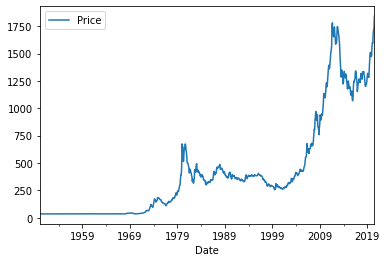

In [61]:
df.plot()

In [62]:
value = pd.DataFrame(series_value)

In [63]:
#giving new values for train n test
_df = pd.concat([value,value.shift(1)],axis=1)

In [64]:
_df.head()

,0,0
0,34.73,NaN
1,34.73,34.73
2,34.73,34.73
3,34.73,34.73
4,34.73,34.73


In [65]:
#giving the columns its names
_df.columns = ["ActualPrice","ForecastPrice"]

In [66]:
_df.head()

,ActualPrice,ForecastPrice
0,34.73,NaN
1,34.73,34.73
2,34.73,34.73
3,34.73,34.73
4,34.73,34.73


In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [68]:
test = _df[1:]

In [69]:
test.head()

,ActualPrice,ForecastPrice
1,34.73,34.73
2,34.73,34.73
3,34.73,34.73
4,34.73,34.73
5,34.73,34.73


In [70]:
test.head()

,ActualPrice,ForecastPrice
1,34.73,34.73
2,34.73,34.73
3,34.73,34.73
4,34.73,34.73
5,34.73,34.73


In [71]:
test = test[0:847]

In [72]:
test.tail()

,ActualPrice,ForecastPrice
842,1593.764,1598.818
843,1680.030,1593.764
844,1715.697,1680.030
845,1734.032,1715.697
846,1840.807,1734.032


In [73]:
#finding error through test and train
error = mean_squared_error(test.ActualPrice,test.ForecastPrice)

In [74]:
error

625.4333454692672

In [75]:
np.sqrt(error)

25.00866540759957

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

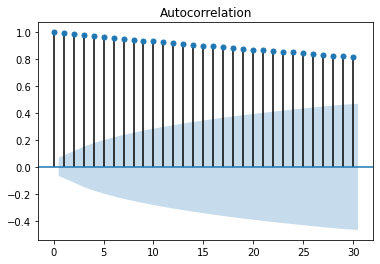

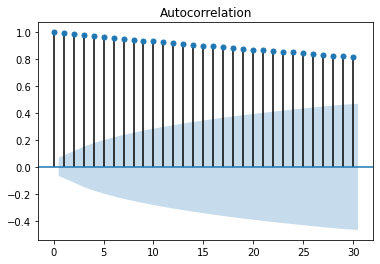

In [77]:
#plotting autocorelation
plot_acf(df)

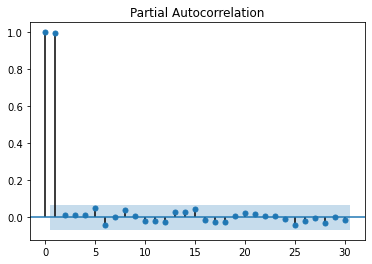

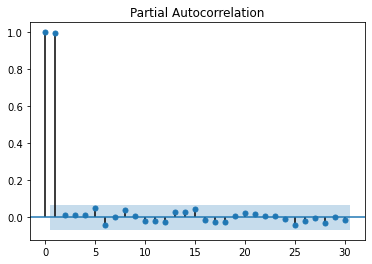

In [78]:
#plotting partial corelation
plot_pacf(df)

In [79]:
df.size

847

In [80]:
#training and testing
df.train = df[0:750]
df_test = df[750:800]

<ipython-input-80-83dea1dfdc88>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.train = df[0:750]


In [81]:
df.train.size

750

In [82]:
df_test.size

50

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
model = ARIMA(df.train , order=(2,1,3))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [85]:
model_fit = model.fit()

In [86]:
model_fit.aic

6676.538700255542

In [87]:
model_forecast = model_fit.forecast(steps = 50)[0]

In [88]:
#model forecast
model_forecast

array([1620.47512585, 1620.83050157, 1634.3152455 , 1641.22933017,
       1651.28331553, 1659.6921918 , 1668.81535174, 1677.49092499,
       1686.29255131, 1694.93848153, 1703.56855078, 1712.11479841,
       1720.61166988, 1729.04312803, 1737.41800726, 1745.73287391,
       1753.99033134, 1762.18999801, 1770.33295418, 1778.41955039,
       1786.4504877 , 1794.42628534, 1802.34754321, 1810.21481257,
       1818.02865987, 1825.78963539, 1833.4982888 , 1841.15516154,
       1848.76079069, 1856.31570716, 1863.82043664, 1871.27549924,
       1878.68140976, 1886.03867759, 1893.3478069 , 1900.6092966 ,
       1907.82364045, 1914.99132708, 1922.11284007, 1929.18865795,
       1936.21925435, 1943.20509793, 1950.14665255, 1957.04437721,
       1963.89872619, 1970.71014904, 1977.47909067, 1984.20599136,
       1990.89128684, 1997.53540831])

In [89]:
df_test

,Price
Date,
2012-07-01,1592.784
2012-08-01,1625.682
2012-09-01,1741.925
2012-10-01,1746.348
2012-11-01,1724.352
2012-12-01,1687.342
2013-01-01,1671.886
2013-02-01,1630.688
2013-03-01,1591.013


In [90]:
#finding the error
a = np.sqrt(mean_squared_error(df_test,model_forecast))

In [91]:
np.sqrt(a)

23.81681613561339